In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [70]:
datasets=sns.get_dataset_names()

In [71]:
df=sns.load_dataset('tips')

In [72]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [73]:
df.shape

(244, 7)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [75]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


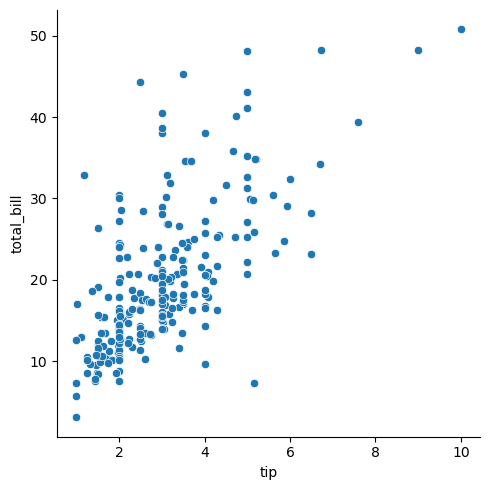

In [76]:
sns.relplot(data=df,x='tip',y='total_bill')

In [77]:
print(df.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


<Axes: xlabel='total_bill', ylabel='Count'>

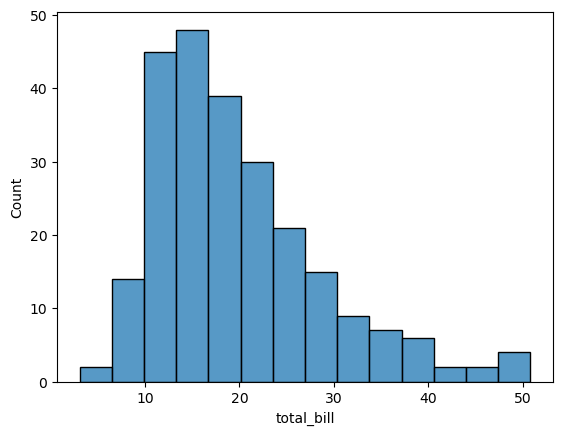

In [78]:
# Histogram to total bill
sns.histplot(data=df.total_bill)

<Axes: xlabel='tip', ylabel='Count'>

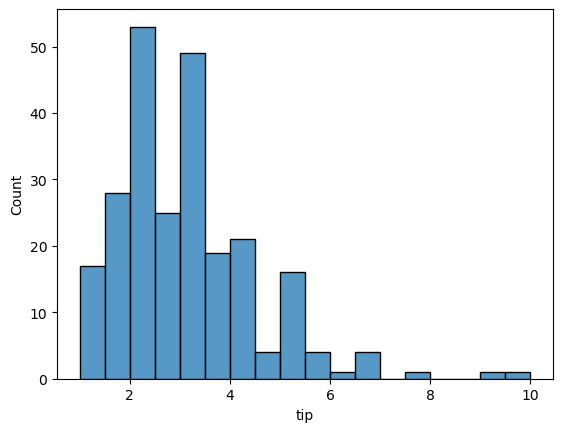

In [79]:
#Histogram on Tips
sns.histplot(df['tip'])

<Axes: xlabel='tip'>

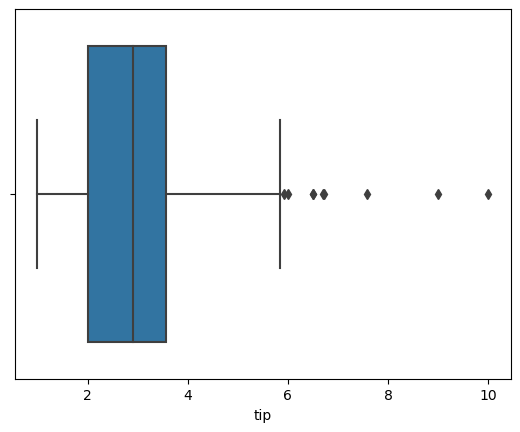

In [80]:
# Finding outliers
sns.boxplot(x=df.tip)

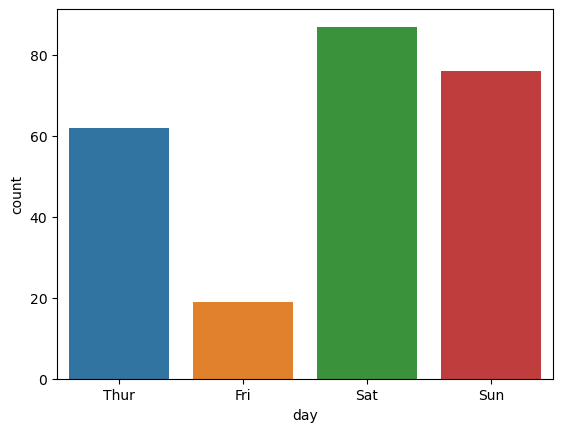

In [81]:
#catogrical feature distribution

sns.countplot(x='day',data=df)
plt.show()

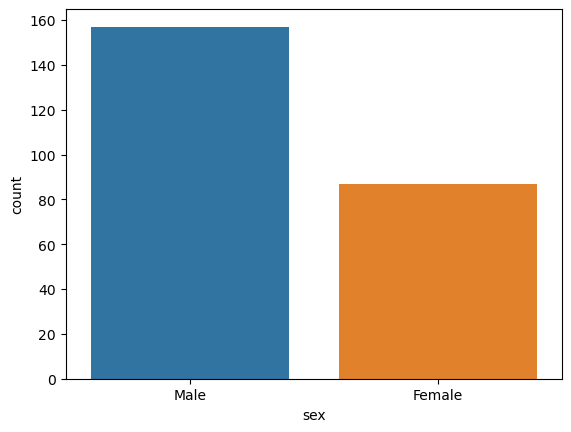

In [82]:
sns.countplot(x='sex',data=df)
plt.show()

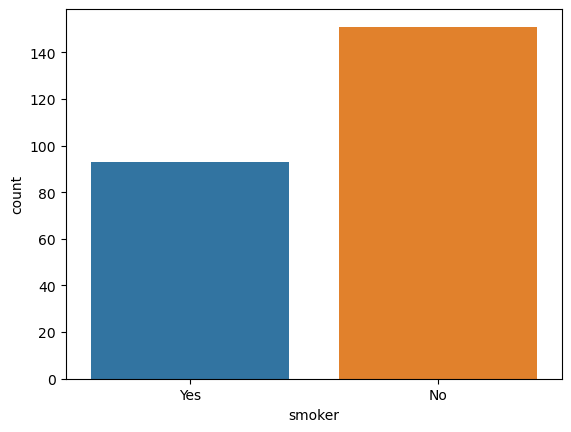

In [83]:
sns.countplot(x='smoker',data=df)
plt.show()

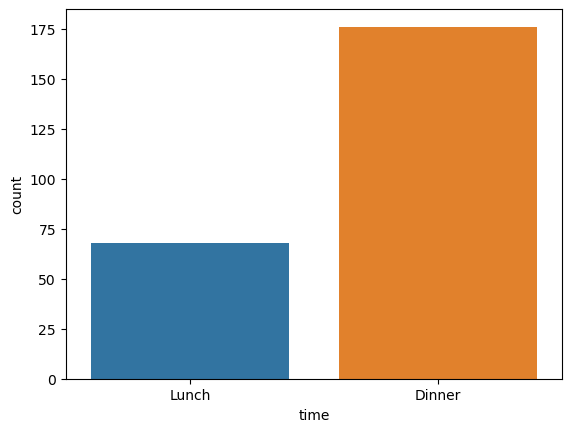

In [84]:
sns.countplot(x='time',data=df)
plt.show()

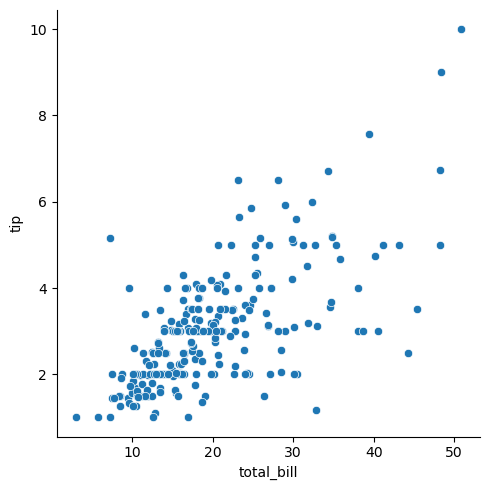

In [85]:
# Bivariate Analysis
sns.relplot(x='total_bill',y='tip',data=df)

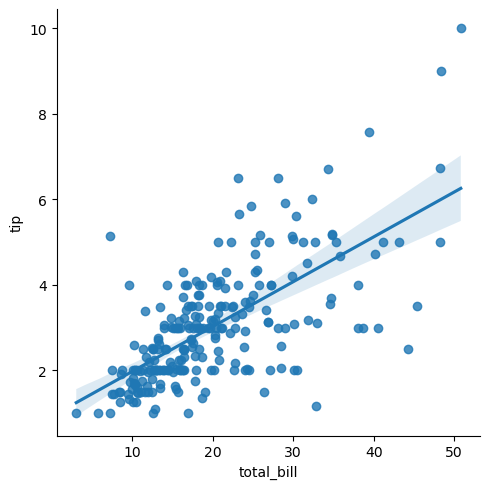

In [86]:
# Linear Regression Line
sns.lmplot(x='total_bill',y='tip',data=df)

<Axes: xlabel='day', ylabel='tip'>

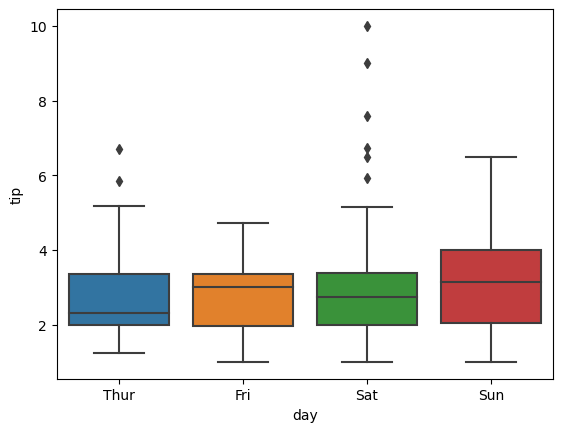

In [87]:
#tip by day
sns.boxplot(x='day',y='tip',data=df)

<Axes: >

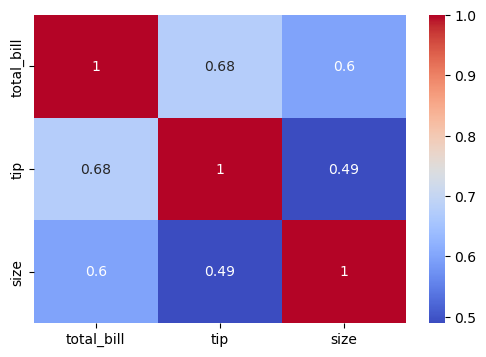

In [88]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [89]:
# Training the dataset on total_bill column
X=df[['total_bill']]

In [90]:
y=df.tip

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
#Model Training
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [93]:
model.score(X_train,y_train)

0.43095110383706514

In [94]:
y_pred=model.predict(X_test)

In [95]:
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

Mean Squared Error:  0.5688142529229537
R2 score: 0.5449381659234664


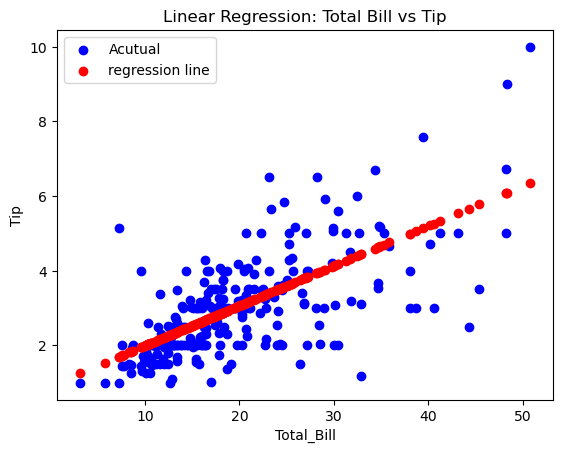

In [100]:
plt.scatter(X,y,color='blue',label='Acutual')
plt.scatter(X,model.predict(X),color='red',label='regression line')
plt.xlabel("Total_Bill")
plt.ylabel("Tip")
plt.title("Linear Regression: Total Bill vs Tip")
plt.legend()
plt.show()

In [104]:
inter=model.intercept_

In [105]:
co=model.coef_[0]

In [106]:
#predicted_Tip=inter+(co*totalbill)

In [107]:
inter+(co*50)

6.273420901191386

In [108]:
# Above anylisis is based on single column now we will do the prediction based on multiple column

In [109]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [114]:
#using Smoker and size
df=sns.load_dataset('tips')
# Training the dataset on total_bill column
df.smoker=df.smoker.map({"Yes":1,"No":0})
X=df[['total_bill','size','smoker']]

y=df.tip

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Model Training
model=LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))

y_pred=model.predict(X_test)

print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

0.45559096661985965
Mean Squared Error:  0.6865980620855362
R2 score: 0.4507089585036145


In [116]:
#Including sex column day and time
df=sns.load_dataset('tips')
# Training the dataset on total_bill column
df.smoker=df.smoker.map({"Yes":1,"No":0})
df.sex=df.sex.map({"Male":1,'Female':0})
X=df[['total_bill','size','smoker','sex']]

y=df.tip

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Model Training
model=LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))

y_pred=model.predict(X_test)

print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

0.45565774584693974
Mean Squared Error:  0.6893921995322699
R2 score: 0.44847359730329506
